In [45]:
import pandas as pd
import numpy as np
from numpy import log
from pmdarima import auto_arima
import warnings
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
warnings.filterwarnings("ignore")

In [29]:
df = pd.read_csv('dataset/bakery_etl.csv')
df.head()

,date,quantity
0,2021-06-09,104
1,2021-02-02,96
2,2021-05-09,327
3,2021-06-14,135
4,2021-02-18,88


In [30]:
df['date'] = pd.to_datetime(df['date'])
df.head()

,date,quantity
0,2021-06-09,104
1,2021-02-02,96
2,2021-05-09,327
3,2021-06-14,135
4,2021-02-18,88


In [31]:
df.set_index('date', inplace=True)
df.head()

,quantity
date,
2021-06-09,104
2021-02-02,96
2021-05-09,327
2021-06-14,135
2021-02-18,88


In [32]:
df.index

DatetimeIndex(['2021-06-09', '2021-02-02', '2021-05-09', '2021-06-14',
               '2021-02-18', '2021-04-06', '2021-05-23', '2021-03-26',
               '2021-01-03', '2021-01-04',
               ...
               '2022-08-09', '2022-09-14', '2022-09-18', '2022-09-29',
               '2022-09-23', '2022-08-02', '2022-09-03', '2022-08-17',
               '2022-09-05', '2022-08-25'],
              dtype='datetime64[ns]', name='date', length=600, freq=None)

In [33]:
df.iloc[-1]

quantity    273
Name: 2022-08-25 00:00:00, dtype: int64

In [34]:
df=df.sort_values('date')
df

,quantity
date,
2021-01-02,128
2021-01-03,171
2021-01-04,128
2021-01-05,99
2021-01-07,109
...,...
2022-09-26,160
2022-09-27,136
2022-09-28,115


In [35]:
df.describe()

,quantity
count,600.000000
mean,195.771667
std,116.976060
min,27.000000
25%,112.750000
50%,154.000000
75%,256.250000
max,707.000000


### CONTROLLO STAZIONARIETÀ

In [36]:
result = adfuller(df.quantity.dropna())
print('ADF Statistics: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistics: -3.405960
p-value: 0.010757


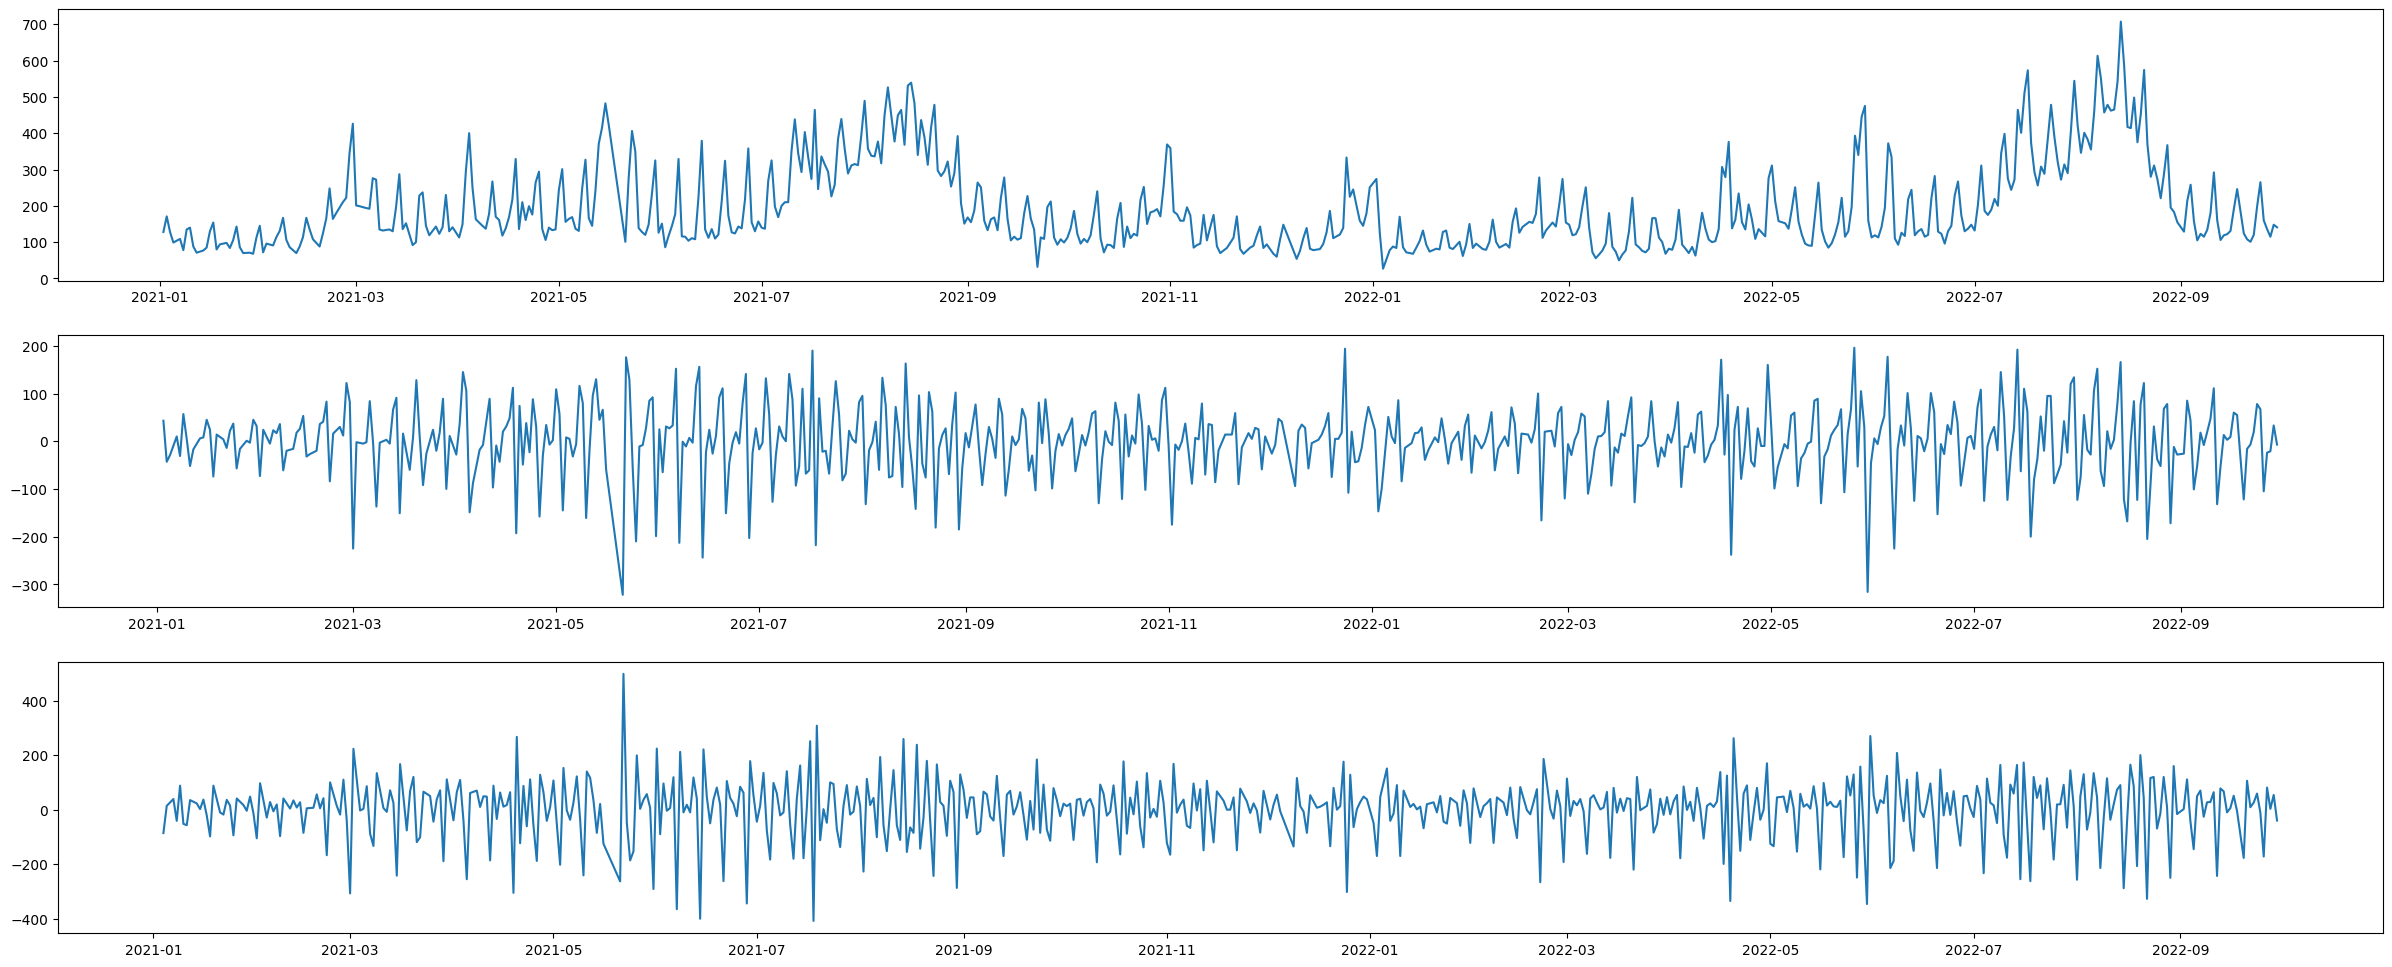

In [78]:
fig = plt.figure(figsize=(30, 12))

ax1 = fig.add_subplot(3, 1, 1)
ax1.plot(df.quantity)

ax2 = fig.add_subplot(3, 1, 2)
ax2.plot(df.quantity.diff().dropna())

ax3 = fig.add_subplot(3, 1, 3)
ax3.plot(df.quantity.diff().diff().dropna())

plt.show()

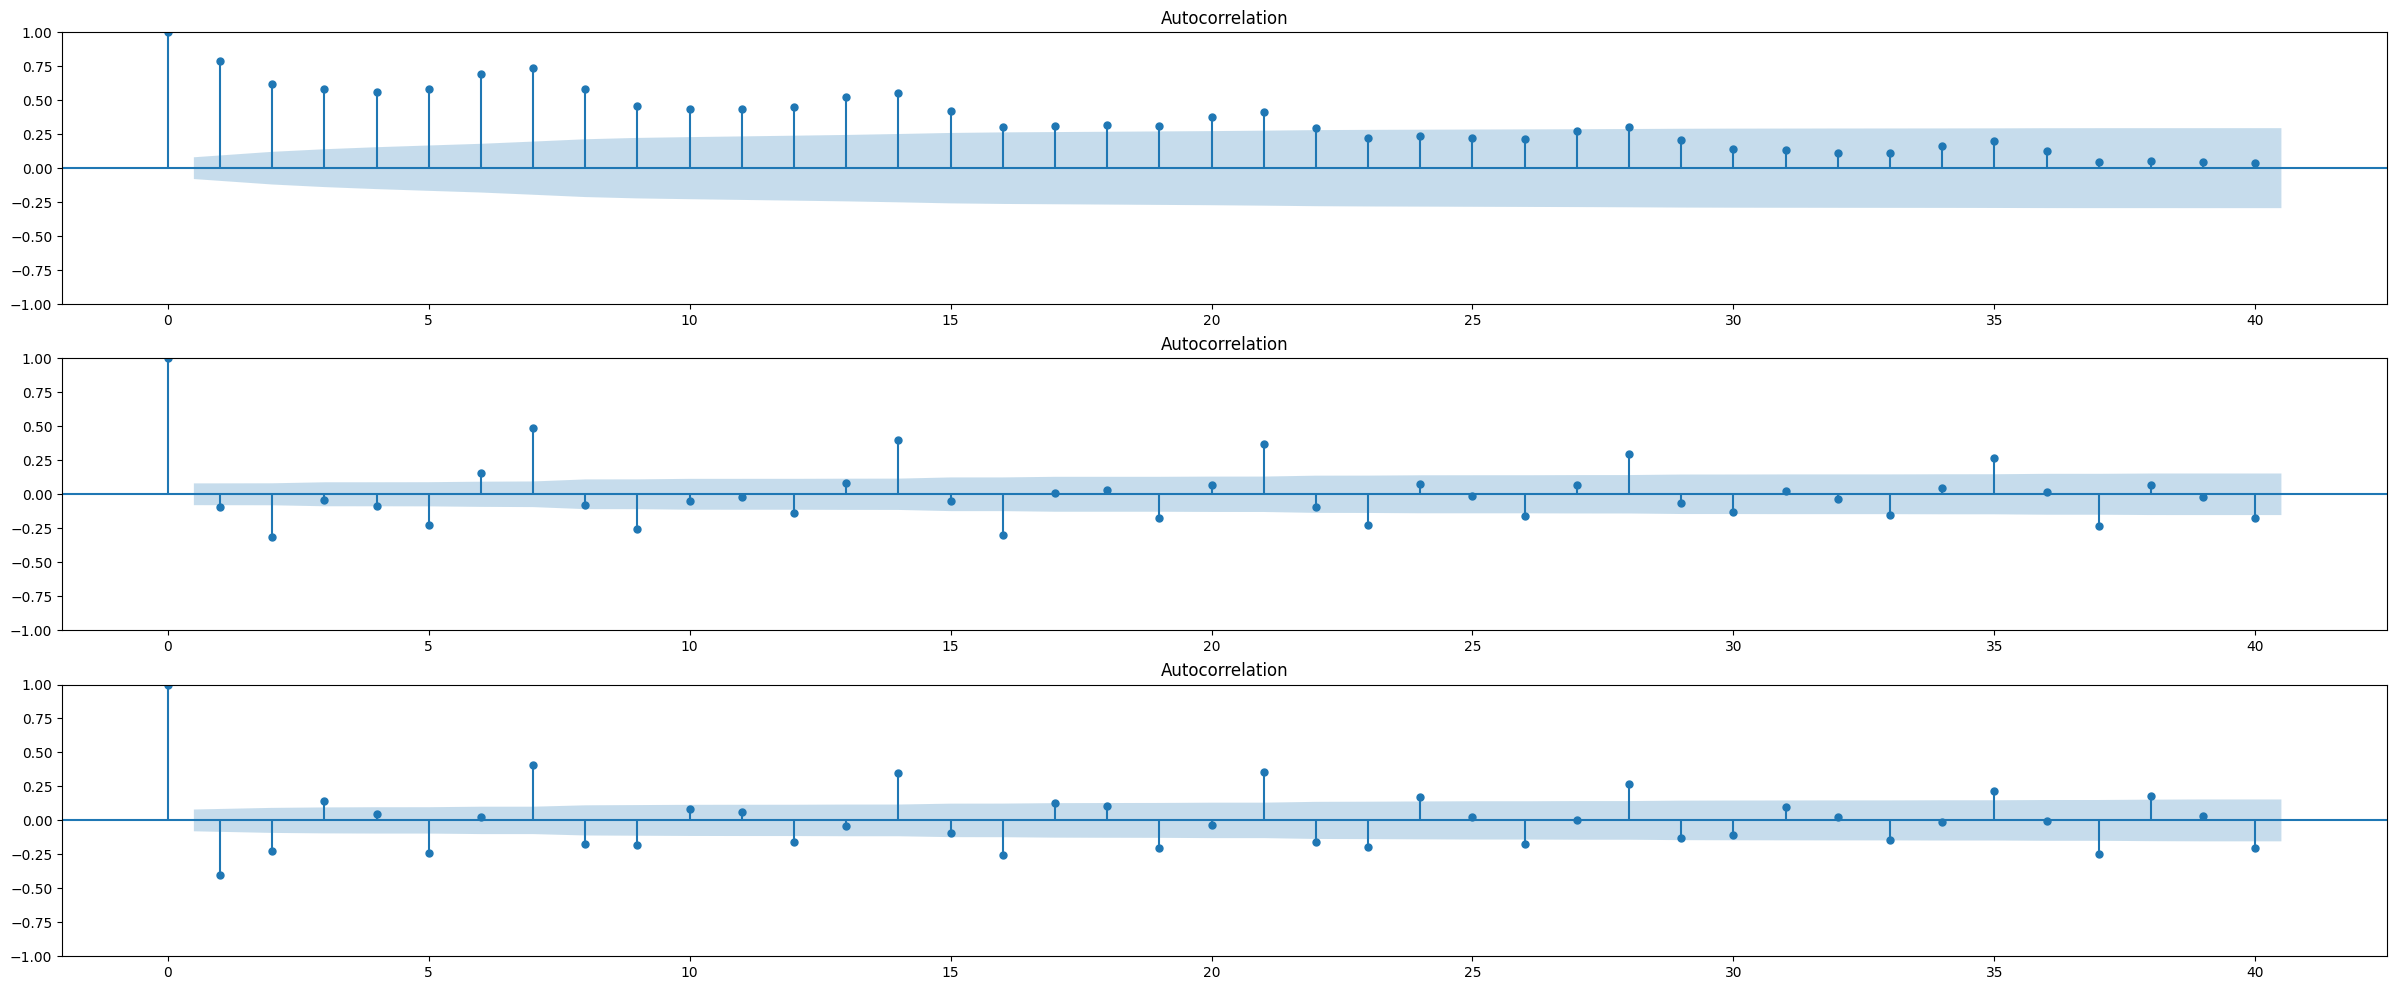

In [79]:
fig = plt.figure(figsize=(30,12))
ax1 = fig.add_subplot(3, 1, 1)
fig = sm.graphics.tsa.plot_acf(df['quantity'][1:], lags=40, ax=ax1)

ax2 = fig.add_subplot(3, 1, 2)
fig = sm.graphics.tsa.plot_acf(df['quantity'].diff().dropna()[1:], lags=40, ax=ax2)

ax3 = fig.add_subplot(3, 1, 3)
fig = sm.graphics.tsa.plot_acf(df['quantity'].diff().diff().dropna()[1:], lags=40, ax=ax3)

plt.show()

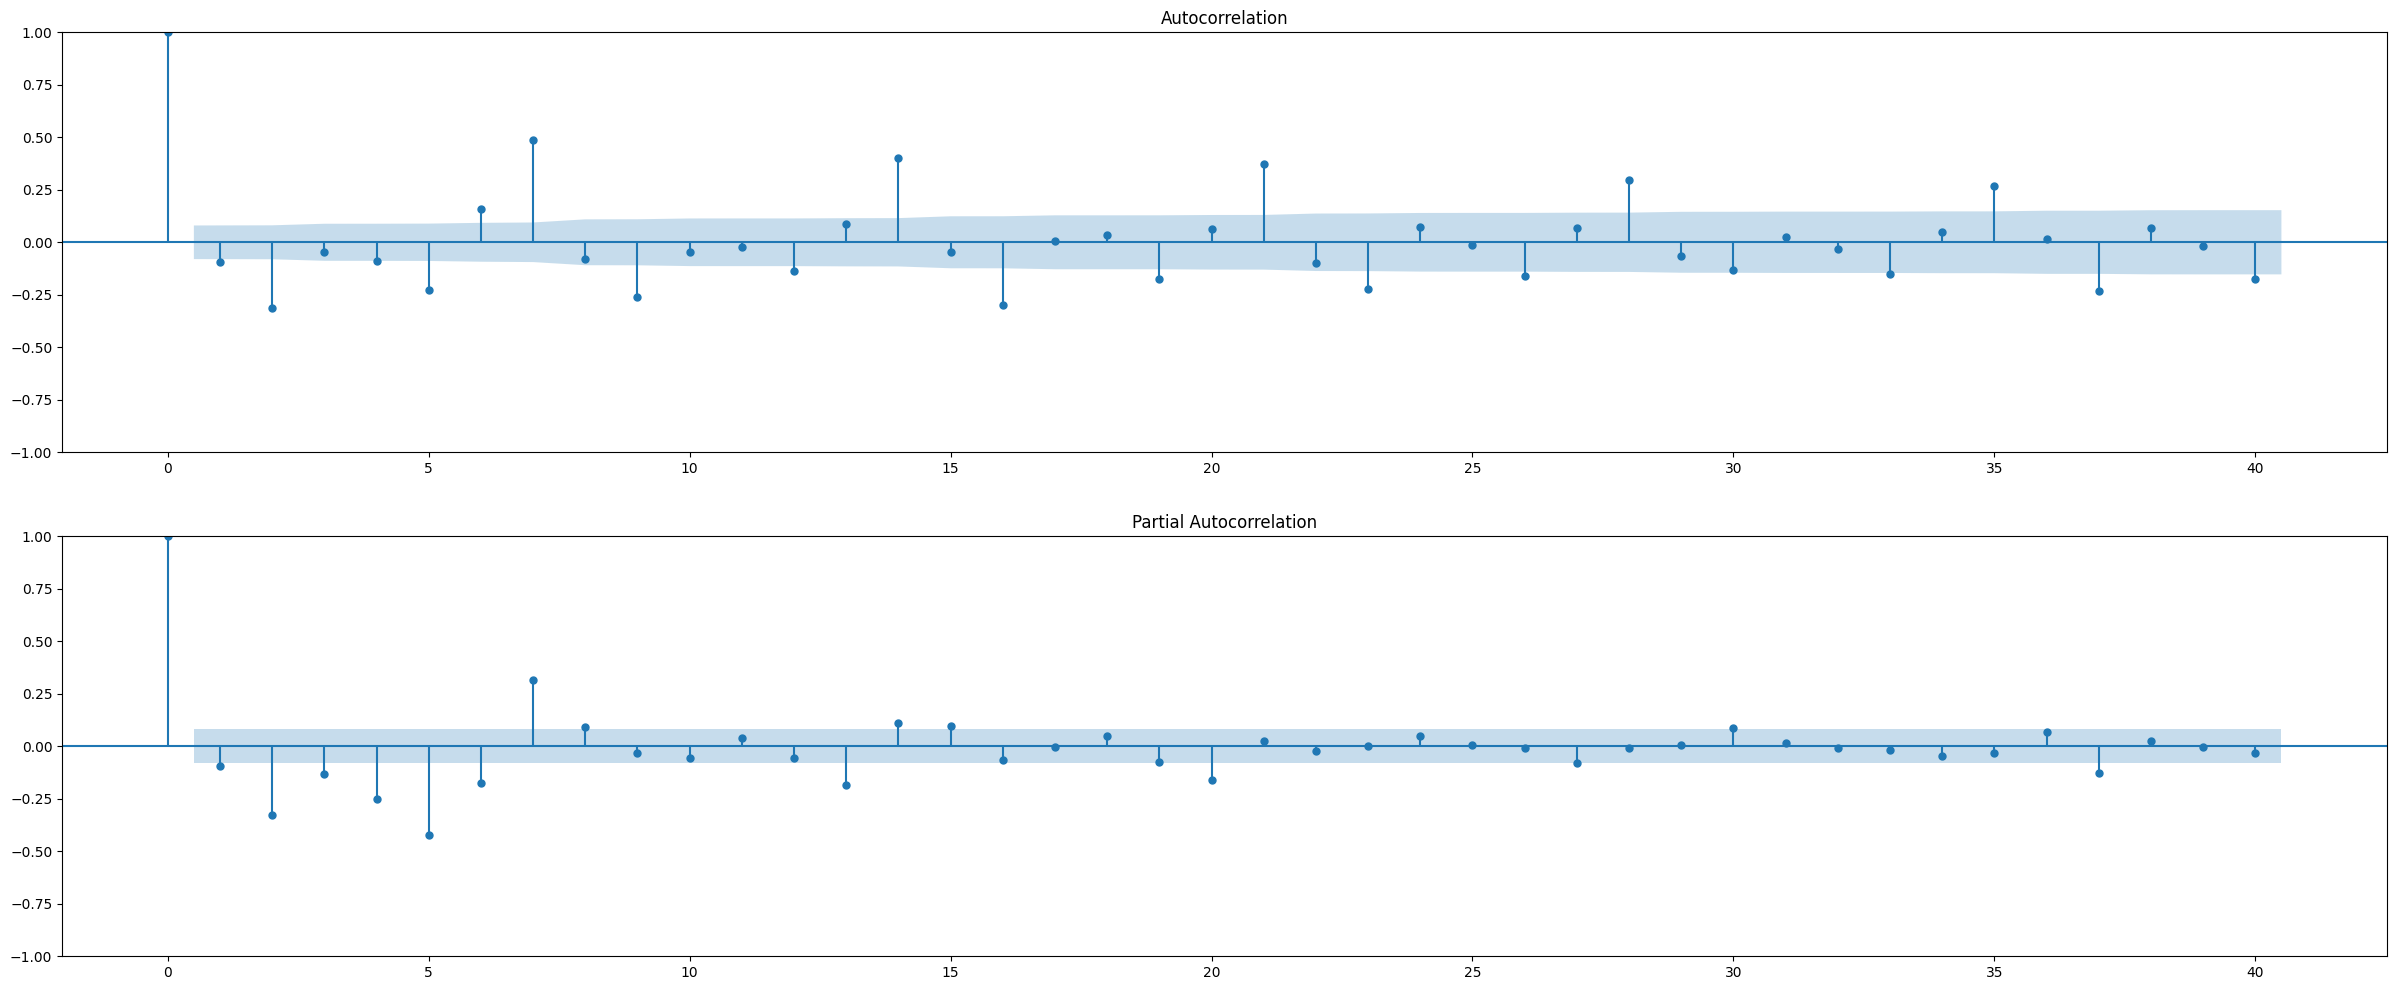

In [80]:
fig = plt.figure(figsize=(30,12))

ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['quantity'].diff()[1:], lags=40, ax=ax1) 

ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['quantity'].diff()[1:], lags=40, ax=ax2)

### AUTOMATIC ALGORITM THAT CONFIRM VALUES FOR ARIMA & SARIMAX

In [41]:
stwpwise_fit = auto_arima(df['quantity'], trace=True, suppress_warnings=True)
stwpwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=6719.298, Time=0.44 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=6884.198, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=6880.757, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=6863.821, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=6882.198, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=6751.493, Time=0.18 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=6746.826, Time=0.18 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=6749.158, Time=0.39 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=6685.233, Time=0.49 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=6749.957, Time=0.25 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=6678.989, Time=0.50 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=6632.737, Time=0.64 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=6637.612, Time=0.51 sec
 ARIMA(5,1,3)(0,0,0)[0] intercept   : AIC=6594.174, Time=0.68 sec
 ARIMA(5,1,2)(0,0,0)[0] intercept

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  600
Model:               SARIMAX(5, 1, 5)   Log Likelihood               -3267.328
Date:                Wed, 14 Dec 2022   AIC                           6556.655
Time:                        18:31:38   BIC                           6605.003
Sample:                             0   HQIC                          6575.477
                                - 600                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5856      0.241      2.427      0.015       0.113       1.058
ar.L2         -1.2847      0.182     -7.053      0.000      -1.642      -0.928
ar.L3          0.5378      0.324      1.658      0.097      -0.098       1.174
ar.L4         -0.8051      0.181     -4.445      0.000      -1.160      -0.450
ar.L5         -0.1248      0.207     -0.602      0.547      -0.531       0.281
ma.L1         -0.9423      0.242     -3.894      0.000      -1.417      -0.468
ma.L2          1.2810      0.247      5.183      0.000       0.797       1.765
ma.L3         -0.9319      0.300     -3.108      0.002      -1.520      -0.344
ma.L4          0.7014      0.225      3.112      0.002       0.260       1.143
ma.L5         -0.1088      0.153     -0.711      0.477      -0.409       0.191
sigma2      3309.9656    148.637     22.269      0.000    3018.642    3601.289
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               127.47
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               0.97   Skew:                            -0.04
Prob(H) (two-sided):                  0.84   Kurtosis:                         5.26
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### ARIMA MODEL FIT

In [81]:
model = ARIMA(df.quantity, order=(5, 1, 5))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:               quantity   No. Observations:                  600
Model:                 ARIMA(5, 1, 5)   Log Likelihood               -3267.328
Date:                Wed, 14 Dec 2022   AIC                           6556.655
Time:                        19:19:39   BIC                           6605.003
Sample:                             0   HQIC                          6575.477
                                - 600                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5856      0.241      2.427      0.015       0.113       1.058
ar.L2         -1.2847      0.182     -7.053      0.000      -1.642      -0.928
ar.L3          0.5378      0.324      1.658      0.0

### PLOT RESIDUAL ERRORS & VALUES DISTRIBUTION

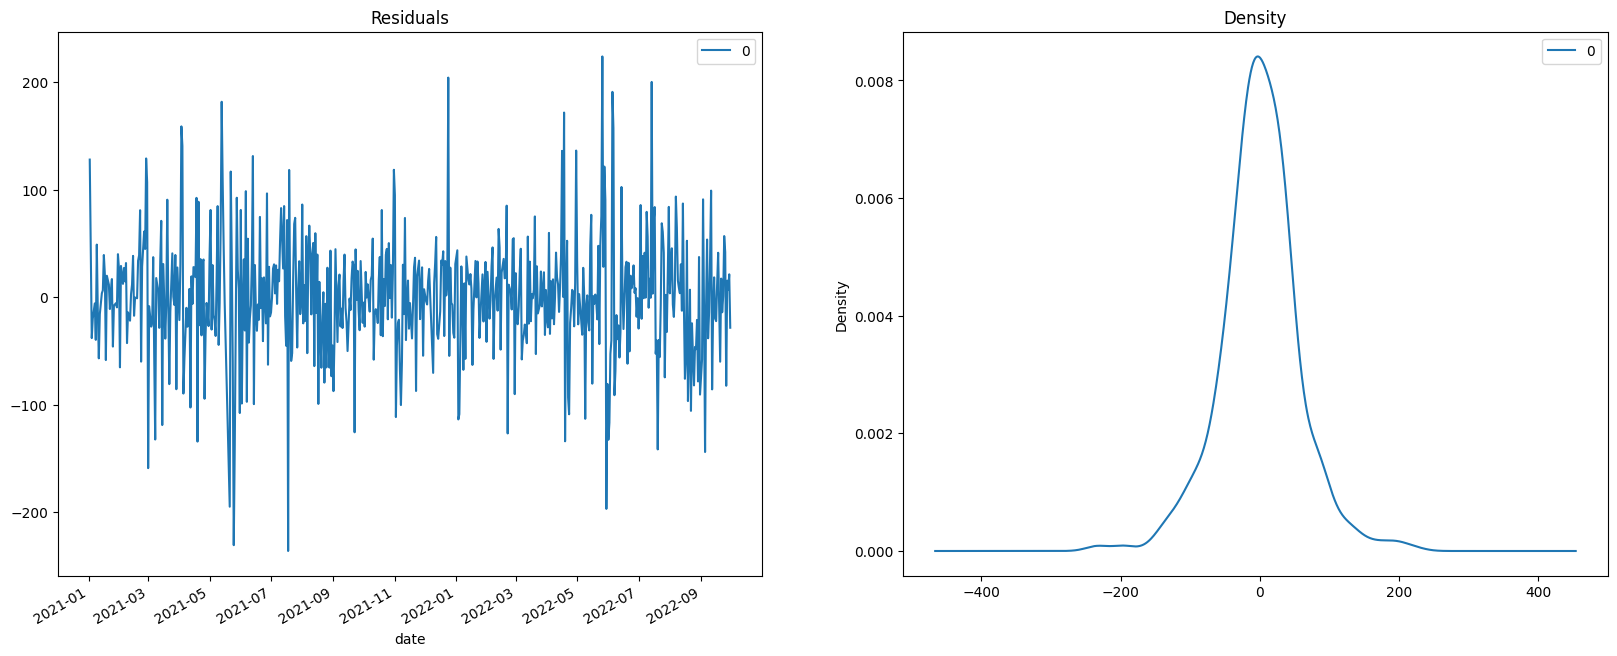

In [82]:
residuals = pd.DataFrame(model_fit.resid)
fig = plt.figure(figsize=(20, 8))
ax = fig.subplots(1, 2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

### ACTUAL VS FITTED (ARIMA HAS NO SEASONAL VALUE)

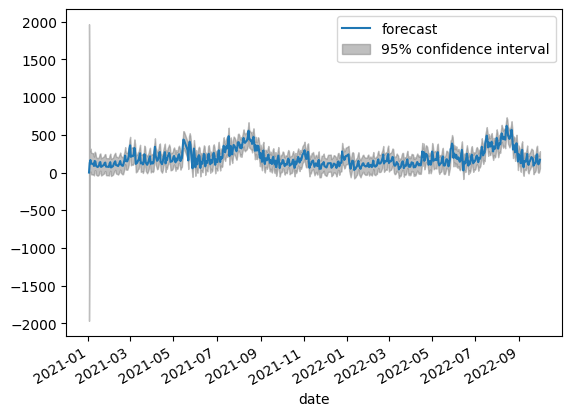

In [83]:
from statsmodels.graphics.tsaplots import plot_predict 
plot_predict(model_fit)
plt.show()

### SEPARATION OF MEAN & STD

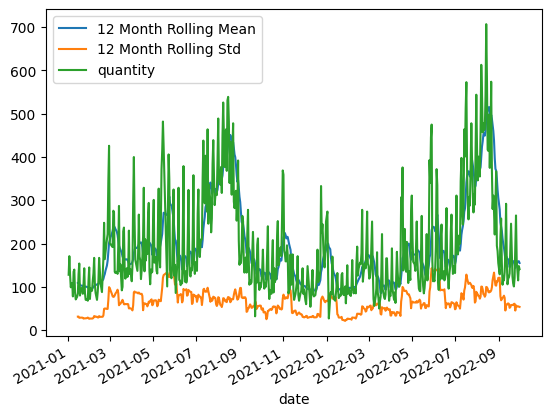

In [87]:
df['quantity'].rolling(12).mean().plot(label='12 Month Rolling Mean')
df['quantity'].rolling(12).std().plot(label='12 Month Rolling Std')
df['quantity'].plot()
plt.legend()

### PLOT TREND - SEASONAL - RESID

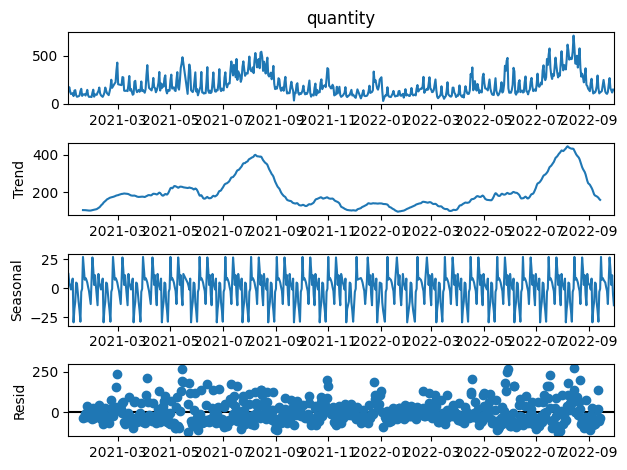

In [88]:
decomp = seasonal_decompose(df['quantity'],period=30)
fig = decomp.plot()

### CREATION OF TRAIN DATASET & TEST DATASET

In [89]:
train = df.quantity[:450]
test = df.quantity[450:]
print("Train:"+str(len(train))+"    "+"Test:"+str(len(test)))

Train:450    Test:150


### SARIMAX PREDICTION

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           13     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.09639D+00    |proj g|=  6.14037D+00


 This problem is unconstrained.



At iterate    5    f=  5.55779D+00    |proj g|=  5.07709D-01

At iterate   10    f=  5.46201D+00    |proj g|=  1.07299D-01

At iterate   15    f=  5.40674D+00    |proj g|=  2.31154D-01

At iterate   20    f=  5.34856D+00    |proj g|=  3.50561D-02

At iterate   25    f=  5.33890D+00    |proj g|=  7.24910D-02

At iterate   30    f=  5.33622D+00    |proj g|=  1.57712D-02

At iterate   35    f=  5.33493D+00    |proj g|=  1.57045D-02

At iterate   40    f=  5.33314D+00    |proj g|=  6.44690D-03

At iterate   45    f=  5.33171D+00    |proj g|=  1.83249D-02

At iterate   50    f=  5.32217D+00    |proj g|=  1.25883D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

<AxesSubplot: xlabel='date'>

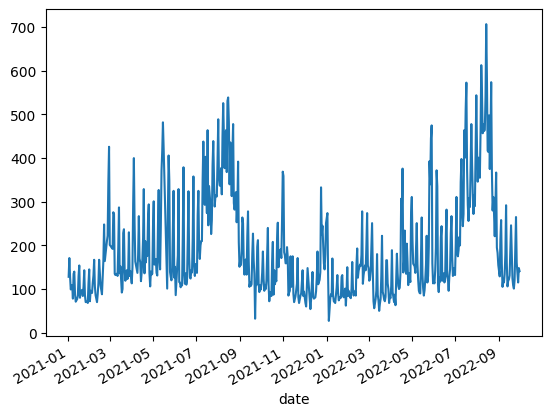

In [92]:
model = sm.tsa.statespace.SARIMAX(train, order=(5, 1, 5), seasonal_order=(1, 1, 1, 12))
fitted = model.fit()

df['forecast'] = fitted.predict(start=450, end=600, dynamic=True)
df['quantity'].plot()
df['forecast'].plot()